# 0909

### Kaggle 데이터 내려받기
1. 캐글 API Token 발급
- 캐글 사이트 account 페이지 이동 > API 섹션 내 CREATE NEW API TOKEN 클릭 > 다운로드된 파일 kaggle.json 확인

https://www.kaggle.com/settings

권한을 세 자리로 나타내는 방식:
- 첫 번째 숫자 (6): **파일 소유자(owner)**에 대한 권한을 나타냅니다.
- 두 번째 숫자 (0): **그룹(group)**에 대한 권한을 나타냅니다.
- 세 번째 숫자 (0): **기타 사용자(others)**에 대한 권한을 나타냅니다.

각 숫자는 다음과 같이 구성됩니다:
- 4: 읽기 권한 (read)
- 2: 쓰기 권한 (write)
- 1: 실행 권한 (execute)
- 0: 아무 권한 없음

https://www.kaggle.com/datasets/biaiscience/dogs-vs-cats?rvi=1

Copy Api command > kaggle datasets download -d biaiscience/dogs-vs-cats

In [7]:
import os, shutil, pathlib

original_dir = pathlib.Path(r"dogs-vs-cats\train")
new_base_dir = pathlib.Path(r'cats_vs_dogs_small')

def make_subset(subset_name, start_index, end_index):
    for category in ('cat', 'dog'):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f'{category}.{i}.jpg' for i in range(start_index, end_index)]
        for fname in fnames:
            src = original_dir / fname
            dst = dir / fname
            shutil.copyfile(src, dst)

make_subset('train', 0, 1000)
make_subset('validation', 1000, 1500)
make_subset('test', 1500, 2500)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'cats_vs_dogs_small\\train\\cat'

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

inputs = tf.keras.Input(shape=(180, 180, 3)) # 칼라 이미지 채널 3개
x = layers.Rescaling(1./255)(inputs)  # 0-255 -> 0-1
x = layers.Conv2D(32, 3, activation='relu')(x)  # 32개의 필터, 3x3
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)  # 이진 분류 문제 - 시그모이드 활성화 함수 사용
model = tf.keras.Model(inputs, outputs)

In [2]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 7, 7, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        12,545 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 991,041 (3.78 MB)

 Trainable params: 991,041 (3.78 MB)

 Non-trainable params: 0 (0.00 B)

RMSprop (Root Mean Square Propagation)
- RMSprop은 적응적 학습률을 사용하여 가중치 업데이트를 할 때 각 매개변수에 대해 개별적인 학습률을 적용합니다. 기본 아이디어는 각 매개변수의 그라디언트의 최근 크기를 사용해 학습률을 조정하는 것입니다. 이 방식은 그라디언트가 크게 변동하는 경우 학습률을 낮추고, 그라디언트가 안정되면 학습률을 높이는 효과가 있습니다.

Adam (Adaptive Moment Estimation)
- Adam은 RMSprop의 장점에 **모멘텀(Momentum)**의 개념을 추가한 알고리즘입니다. 그라디언트의 1차 모멘트(평균)와 2차 모멘트(제곱 평균)을 모두 추적합니다. 즉, 그라디언트의 크기와 방향을 모두 고려하여 가중치를 업데이트합니다. 이러한 방식은 RMSprop보다 더 안정적이고 빠른 수렴을 가능하게 합니다.

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / 'train',
    image_size=(180, 180),
    batch_size=32
)

validation_dataset = image_dataset_from_directory(
    new_base_dir / 'validation',
    image_size=(180, 180),
    batch_size=32
)
test_dataset = image_dataset_from_directory(
    new_base_dir / 'test',
    image_size=(180, 180),
    batch_size=32
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [9]:
for data_batch, labels_batch in train_dataset:
    print("데이터 배치 크기: ",data_batch.shape)
    print("레이블 배치 크기: ",labels_batch.shape)
    break

데이터 배치 크기:  (32, 180, 180, 3)
레이블 배치 크기:  (32,)


In [10]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='convnet_from_scratch.keras',
        save_best_only=True,
        monitor='val_loss'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)
]


history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=30,
    callbacks=callbacks
)
        

Epoch 1/30
10/63 ━━━━━━━━━━━━━━━━━━━━ 30s 568ms/step - accuracy: 0.4451 - loss: 0.7036

KeyboardInterrupt: 

# 0910

## 서설

https://www.napkin.ai/

인포그래픽 제작 툴

시각화 툴

In [ ]:
import matplotlib.pyplot as plt
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

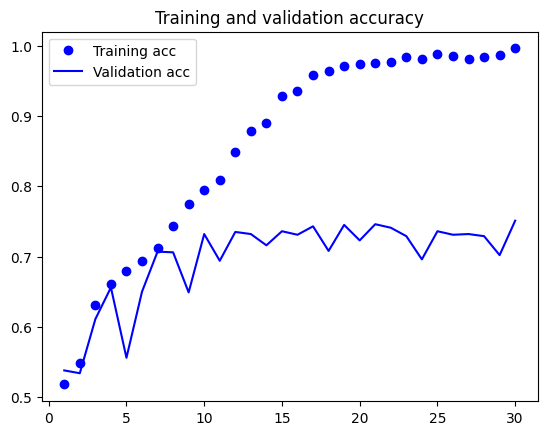

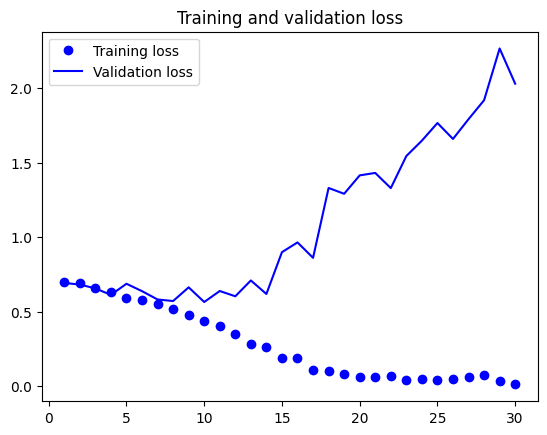

### early stopping (조기 종료)적용


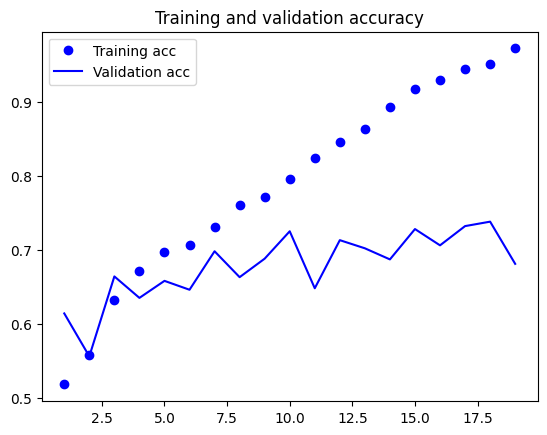

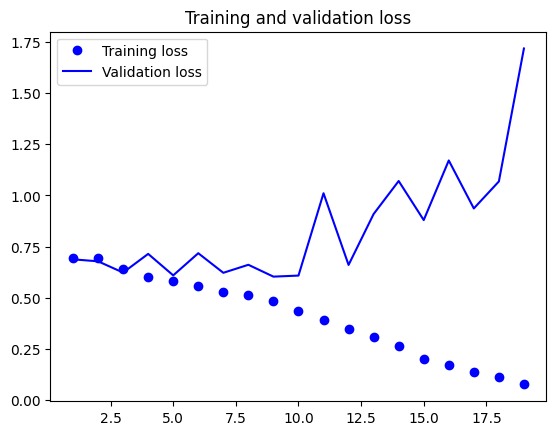

In [12]:
test_model = tf.keras.models.load_model('convnet_from_scratch.keras')
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - accuracy: 0.7258 - loss: 0.5602
Test accuracy: 0.7074999809265137


정확도가 낮은 이유는 학습데이터가 적기 때문이다.

원 데이터는 25000개이지만 2000개만 사용했기 때문에 정확도가 낮다.



### 데이터 증식

이미지 데이터는 이미지 증식이 효과적



**컨브넷에 추가할 데이터 증식 단계 정의하기**

세 가지 데이터 증강 기법

- layers.RandomFlip("horizontal"): 이미지를 수평 방향으로 무작위로 뒤집습니다. 이는 이미지에 대한 모델의 위치 불변성을 증가시키는 데 도움이 됩니다.

- layers.RandomRotation(0.1): 이미지를 최대 0.1 라디안(약 5.7도) 범위에서 무작위로 회전시킵니다. 회전은 중심을 기준으로 하며, 빈 영역은 근접한 픽셀로 채워집니다.

- layers.RandomZoom(0.2): 이미지를 최대 20% 범위에서 무작위로 확대/축소합니다. 빈 영역은 근접한 픽셀로 채워집니다.

In [16]:
# sequential 순차적으로 변환
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
])

램덤하게 증식한 훈련 이미지 출력하기

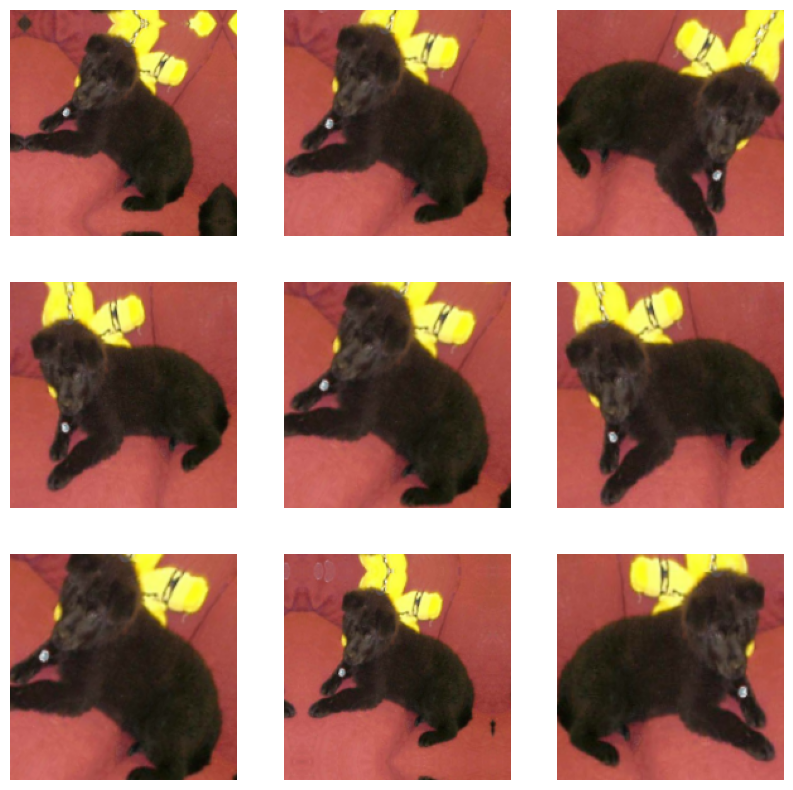

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))  # augmented_images[0] 배치의 첫 번째 이미지, 
        plt.axis("off")

In [19]:
inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)
x = layers.Conv2D(256, 3, activation='relu')(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [20]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras", save_best_only=True, monitor="val_loss"
    ),
]


history = model.fit(
    train_dataset, validation_data=validation_dataset, epochs=100, callbacks=callbacks
)

Epoch 1/100
 6/63 ━━━━━━━━━━━━━━━━━━━━ 34s 602ms/step - accuracy: 0.5493 - loss: 0.7331

KeyboardInterrupt: 

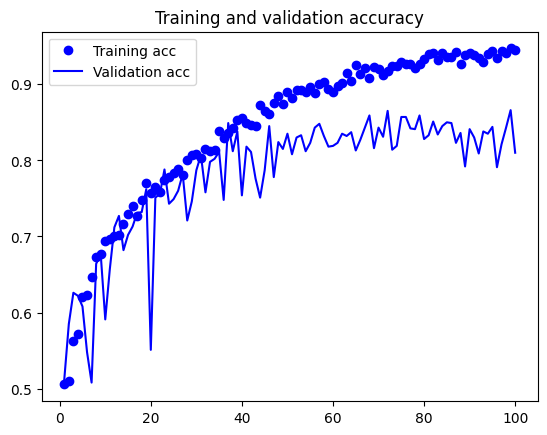

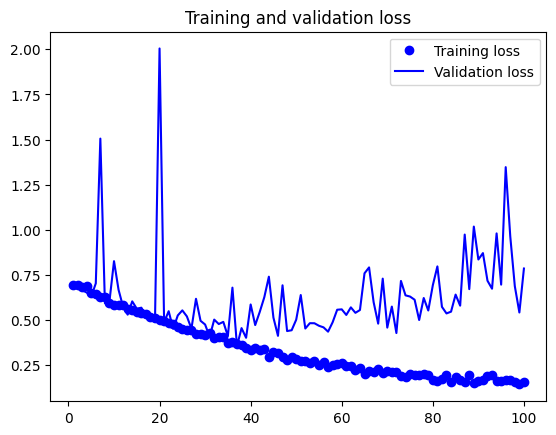

In [21]:
test_model = tf.keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 160ms/step - accuracy: 0.7212 - loss: 0.5790
Test accuracy: 0.7074999809265137


In [22]:
#dataset 데이터 갯수 확인
print("train_dataset:", len(train_dataset))

train_dataset: 63


### 사전 훈련된 모델 활용하기

#### 사전 훈련된 모델을 사용한 특성 추출


vgg16 합성곱 기반 층 만들기

ImageNet 데이터셋

- ImageNet은 컴퓨터 비전 분야에서 매우 유명한 대규모 데이터셋입니다.
- 이 데이터셋은 `1,000개`의 클래스로 구성되어 있으며, 각 클래스에는 다양한 객체가 포함되어 있습니다. 예를 들어, 동물, 식물, 사물 등의 카테고리가 있습니다.
- `1,400만 개` 이상의 이미지로 이루어져 있으며, 각 이미지에는 하나 이상의 객체에 대한 레이블이 붙어 있습니다.
- VGG16 모델은 **ILSVRC (ImageNet Large Scale Visual Recognition Challenge)**에서 사용된 1000개의 클래스에 대한 데이터를 사용해 훈련되었습니다. 이 챌린지는 이미지 분류, 객체 탐지 등의 다양한 비전 작업을 위한 벤치마크입니다.

In [31]:
import tensorflow as tf
from tensorflow.keras import layers
conv_base =  tf.keras.applications.vgg16.VGG16(
    include_top=False, # 네트워크의 최상위 완전 연결 분류기를 포함할지 여부
    weights='imagenet', # ImageNet 데이터로 사전 훈련된 가중치 사용
    input_shape=(180, 180, 3)
)

include_top=False의 default 값은 True

- include_top=True: VGG16 모델의 마지막에 있는 완전 연결 분류기 층(3개의 Dense 층과 마지막 Softmax 층)이 포함됩니다. 이는 주로 ImageNet 데이터셋과 동일한 1,000개의 클래스를 분류할 때 사용됩니다.
- include_top=False: VGG16 모델의 상단 분류기 부분을 제외하고, 합성곱층 기반만을 사용합니다. 이 옵션은 특징 추출(feature extraction) 작업에 유용하며, `마지막 층을 사용자의 문제에 맞게 재구성하거나 새로운 분류기를 추가할 수 있습니다.` - 문제에 맞게 재구성 - 전이학습, 트랜스퍼러닝, 

In [32]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

이미 학습된 모델에 말단만 개와 고양이로 나눠서 추가 학습하면 좋다.

In [25]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)  # VGG16 모델에 맞게 이미지 전처리 - 정규화방식
        features = conv_base(preprocessed_images)  #전처리된 이미지를 입력받아 그에 대한 특징을 추출, 출력은 클래스 예측이 아닌 이미지의 특징맵
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)  #배치 단위로 추출된 특징과 레이블을 하나의 배열로 합침

train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

In [26]:
train_features.shape

(2000, 5, 5, 512)

In [28]:
inputs = tf.keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction.keras", save_best_only=True, monitor="val_loss"
    ),
]

history = model.fit(
    train_features, train_labels, 
    validation_data=(val_features, val_labels), 
    epochs=20, 
    callbacks=callbacks
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.8609 - loss: 20.3839 - val_accuracy: 0.9360 - val_loss: 1.1303
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.9800 - loss: 0.2956 - val_accuracy: 0.9600 - val_loss: 0.7232
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.9837 - loss: 0.2847 - val_accuracy: 0.9670 - val_loss: 0.6039
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9927 - loss: 0.2096 - val_accuracy: 0.9640 - val_loss: 0.8156
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9910 - loss: 0.1639 - val_accuracy: 0.9680 - val_loss: 0.7802
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9980 - loss: 0.0392 - val_accuracy: 0.9750 - val_loss: 0.9479
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9973 - loss: 0.0257 - val_accuracy: 0.9680 - val_loss: 1.1972
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.9989 - loss: 0.0136 - val_accuracy: 0.9740 - 

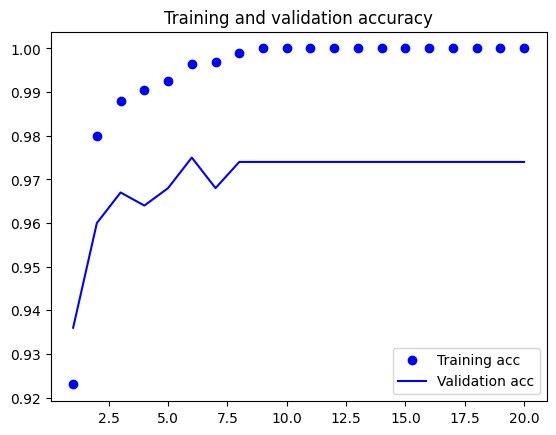

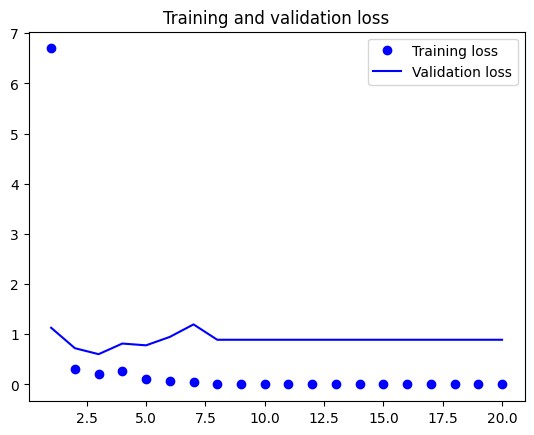

In [29]:
import matplotlib.pyplot as plt

plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [33]:
test_model = tf.keras.models.load_model("feature_extraction.keras")
test_loss, test_acc = test_model.evaluate(test_features, test_labels)
print(f"Test accuracy: {test_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9632 - loss: 1.0704
Test accuracy: 0.9714999794960022


위에서 처럼 모델을 구성한 것은 vgg16의 학습중 트레이닝 안되게 만들기 위함

전체로 구성하면 학습이 되기 때문에

**전이 학습(Transfer Learning)**은 **이미 훈련된 모델**의 가중치를 새로운 문제에 적용하여 **재학습**하는 방법입니다. 이 방법은 특히 **큰 데이터셋**과 **복잡한 모델**이 필요한 딥러닝에서 매우 유용합니다. 전이 학습의 핵심 개념은 **한 도메인에서 학습한 지식을 다른 도메인**에 전이하는 것입니다.

### 전이 학습의 주요 아이디어
일반적으로 전이 학습은 다음과 같은 흐름을 따릅니다:

1. **사전 훈련된 모델 사용**:
   - 전이 학습에서 사전 훈련된 모델은 보통 **ImageNet** 같은 대규모 데이터셋에서 학습된 모델을 의미합니다.
   - 예를 들어, **VGG16**, **ResNet**, **Inception**과 같은 딥러닝 모델들은 수백만 개의 이미지를 사용해 사물 분류에 대한 특징을 학습한 상태입니다.

2. **특징 추출**:
   - 사전 훈련된 모델의 **초기 계층(저수준 특징 추출기)**은 **경계선, 질감, 색상**과 같은 일반적인 특징을 학습합니다.
   - 이 부분을 유지하면서, 특정 문제에 맞게 **모델의 상단 층**(보통 **분류기 층**)을 재구성하여 새로운 데이터셋에 맞는 분류를 학습시킬 수 있습니다.

3. **미세 조정(Fine-tuning)**:
   - 전이 학습에서 일반적으로 모델의 상단 일부만을 새 데이터셋에 맞게 재학습(fine-tuning)하거나, 사전 훈련된 가중치를 **고정(freeze)**하고 최상단 분류층만 학습시키는 방식이 사용됩니다.
   - 일부 경우에는 사전 훈련된 모델 전체에 대해 **미세 조정(fine-tuning)**을 수행하여 모델이 새로운 데이터셋에 맞게 더욱 잘 적응할 수 있도록 합니다.

### 전이 학습의 주요 단계

1. **사전 훈련된 모델 로드**:
   - ImageNet과 같은 대규모 데이터셋으로 학습된 모델을 로드합니다.
   - 모델의 구조와 가중치를 가져옵니다. 이때, `include_top=False`로 설정하여 모델의 마지막 분류층을 제외하고, 특징 추출에만 사용되는 합성곱 계층들을 사용할 수 있습니다.

2. **모델 동결(Freeze)**:
   - 학습된 가중치를 **고정(freeze)**하여 초기 계층의 가중치가 업데이트되지 않도록 설정합니다. 이는 모델이 기존 학습된 정보를 유지하면서 새로운 데이터셋에 적응하도록 하기 위함입니다.

3. **새 분류기 추가**:
   - 사전 훈련된 모델의 마지막 계층 위에 **새로운 분류기**(Dense Layer나 Softmax Layer 등)를 추가하여, 새로운 문제에 맞는 레이블로 모델이 학습할 수 있도록 합니다.
   - 예를 들어, 고양이와 개를 분류하는 문제라면 두 개의 출력 뉴런을 가진 분류층을 추가할 수 있습니다.

4. **새 데이터로 학습**:
   - 새로운 데이터셋을 사용해 모델을 **재학습**합니다. 이때, 일부 계층은 고정된 채로 유지하고, 새로운 분류기 층만 학습시키거나 전체 모델을 미세 조정할 수 있습니다.

### 전이 학습의 장점

1. **적은 데이터로도 학습 가능**:
   - 새로운 문제에 대해 학습할 때, 사전 훈련된 모델이 기존에 학습한 정보가 이미 포함되어 있으므로 **작은 데이터셋**으로도 좋은 성능을 얻을 수 있습니다. 이는 특히 대규모 데이터셋을 확보하기 어려운 경우에 유리합니다.

2. **시간과 자원 절약**:
   - 모델을 처음부터 학습시키지 않고 사전 훈련된 모델을 사용하므로 **훈련 시간과 자원**을 절약할 수 있습니다.

3. **성능 향상**:
   - 사전 훈련된 모델이 큰 데이터셋에서 학습한 **일반적인 패턴**을 활용할 수 있어, 더 빠르게 **좋은 성능**을 얻을 수 있습니다.

### 전이 학습의 예시

#### 1. **이미지 분류**
   - **ImageNet**에서 사전 훈련된 모델(VGG, ResNet 등)을 가져와, 다른 데이터셋(예: 고양이와 개를 구분하는 데이터셋)에서 학습을 수행할 수 있습니다.
   
#### 2. **객체 탐지(Object Detection)**
   - 전이 학습은 **YOLO**(이것이 사전훈련된 모델)나 **Faster R-CNN** 같은 객체 탐지 모델에서도 사용됩니다. 사전 훈련된 모델을 기반으로 특정 도메인의 객체를 탐지하는 데 활용됩니다.

#### 3. **자연어 처리(NLP)**
   - NLP 분야에서는 **BERT**, **GPT**와 같은 사전 훈련된 모델이 다양한 언어 이해 및 생성 작업에 활용됩니다. 새로운 텍스트 데이터에 맞게 미세 조정하여 번역, 감정 분석, 텍스트 생성 등의 작업을 수행할 수 있습니다.

전이 학습은 **사전 훈련된 모델을 기반으로 새로운 문제를 해결**하는 방법으로, 특히 **소량의 데이터**로도 **효율적으로 학습**할 수 있는 방법입니다. 사전 훈련된 모델이 일반적인 패턴을 학습한 상태에서, 새로운 도메인에 맞게 상위층을 재학습하거나 전체 모델을 미세 조정하는 방식으로 사용됩니다. 전이 학습은 **이미지 분류**, **객체 탐지**, **자연어 처리** 등 다양한 딥러닝 분야에서 매우 널리 사용되고 있습니다.


In [35]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model():
    #1. 사전 훈련된 VGG16 네트워크 불러오기
    conv_base = tf.keras.applications.vgg16.VGG16(
        include_top=False,  #네트워크의 최상위 완전 연결 분류기를 포함할지 여부
        weights='imagenet', 
        input_shape=(180, 180, 3)
    )
    
    #2. VGG16 네트워크의 가중치를 동결
    conv_base.trainable = False

    #3. VGG16 네트워크를 이용해 새로운 모델 구성(함수형 api 사용)
    inputs = tf.keras.Input(shape=(180, 180, 3))
    x = conv_base(inputs)
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    #4. 새로운 모델 생성
    model = models.Model(inputs, outputs)

    #5. 모델 컴파일
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

    return model

#6. 모델 생성
model = build_model()

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="fine_tuned_model.keras", 
        save_best_only=True, 
        monitor="val_loss"
    ),
]

# 7. 모델 훈련
history = model.fit(
    train_dataset, 
    validation_data=validation_dataset, 
    epochs=20, 
    callbacks=callbacks
)

Epoch 1/20
 9/63 ━━━━━━━━━━━━━━━━━━━━ 2:00 2s/step - accuracy: 0.6720 - loss: 15.1891

KeyboardInterrupt: 

In [ ]:
test_model = tf.keras.models.load_model("fine_tuned_model.keras")

test_loss, test_acc = test_model.evaluate(test_dataset, verbose=1)
print(f"Test accuracy: {test_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9587 - loss: 0.9252
Test accuracy: 0.9585000276565552